# Best Models Exploratory Analysis + Visualization

## Exp A

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("C:/Users/navme/Desktop/ECG_Project/paper/docs/ECG CLIP RESULTS - FINAL - ExpA - Best Models.csv")

In [28]:
def extract_mean(value):
    return float(value.split('±')[0])

In [29]:
df['mean_ptb_xl'] = df['test_metrics__ptb_xl'].apply(extract_mean)
df['mean_ningbo'] = df['test_metrics__ningbo'].apply(extract_mean)
df['mean_georgia'] = df['test_metrics__georgia'].apply(extract_mean)

In [30]:
df['average_performance_seen'] = df[['mean_ptb_xl', 'mean_ningbo', 'mean_georgia']].mean(axis=1)

In [31]:
best_model_seen = df.loc[df['average_performance_seen'].idxmax()]

print("Best overall model in Exp A (seen classes):")
print(best_model_seen)

Best overall model in Exp A (seen classes):
Model UID                                                       23
n_configs                                                        4
text_encoder_model                 emilyalsentzer/Bio_ClinicalBERT
ecg_encoder_model                                     CNN_model_v2
train_datasets                     ('ptb_xl', 'ningbo', 'georgia')
pretrained                                                   False
test_metrics__ptb_xl                                   0.730±0.017
test_metrics__ningbo                                   0.802±0.032
test_metrics__georgia                                  0.710±0.016
zero_shot_test_metrics__ptb_xl                         0.615±0.035
zero_shot_test_metrics__ningbo                         0.640±0.015
zero_shot_test_metrics__georgia                        0.698±0.009
exp2_metrics_trained__sph                              0.829±0.029
exp2_metrics_trained__code15                               nan±nan
exp2_metrics_untra

In [32]:
df['mean_zero_shot_ptb_xl'] = df['zero_shot_test_metrics__ptb_xl'].apply(extract_mean)
df['mean_zero_shot_ningbo'] = df['zero_shot_test_metrics__ningbo'].apply(extract_mean)
df['mean_zero_shot_georgia'] = df['zero_shot_test_metrics__georgia'].apply(extract_mean)

In [33]:
df['average_performance_unseen'] = df[['mean_zero_shot_ptb_xl', 'mean_zero_shot_ningbo', 'mean_zero_shot_georgia']].mean(axis=1)

In [37]:
best_model_unseen = df.loc[df['average_performance_unseen'].idxmax()]

print("Best overall model for Exp A (unseen):")
print(best_model_unseen)

Best overall model for Exp A (unseen):
Model UID                                                       20
n_configs                                                        4
text_encoder_model                 emilyalsentzer/Bio_ClinicalBERT
ecg_encoder_model                                        CNN_model
train_datasets                     ('ptb_xl', 'ningbo', 'georgia')
pretrained                                                   False
test_metrics__ptb_xl                                   0.739±0.009
test_metrics__ningbo                                   0.785±0.025
test_metrics__georgia                                  0.701±0.024
zero_shot_test_metrics__ptb_xl                         0.632±0.024
zero_shot_test_metrics__ningbo                         0.668±0.032
zero_shot_test_metrics__georgia                        0.698±0.016
exp2_metrics_trained__sph                              0.817±0.016
exp2_metrics_trained__code15                               nan±nan
exp2_metrics_untrained_

## Exp B

In [35]:
df['mean_trained_sph'] = df['exp2_metrics_trained__sph'].apply(extract_mean)
df['mean_untrained_sph'] = df['exp2_metrics_untrained__sph'].apply(extract_mean)
df['mean_untrained_code15'] = df['exp2_metrics_untrained__code15'].apply(extract_mean)

In [38]:
df['average_performance_expB'] = df[['mean_trained_sph', 'mean_untrained_sph', 'mean_untrained_code15']].mean(axis=1)

In [39]:
best_model_expB = df.loc[df['average_performance_expB'].idxmax()]

print("Best overall model for Exp B:")
print(best_model_expB)

Best overall model for Exp B:
Model UID                                                       23
n_configs                                                        4
text_encoder_model                 emilyalsentzer/Bio_ClinicalBERT
ecg_encoder_model                                     CNN_model_v2
train_datasets                     ('ptb_xl', 'ningbo', 'georgia')
pretrained                                                   False
test_metrics__ptb_xl                                   0.730±0.017
test_metrics__ningbo                                   0.802±0.032
test_metrics__georgia                                  0.710±0.016
zero_shot_test_metrics__ptb_xl                         0.615±0.035
zero_shot_test_metrics__ningbo                         0.640±0.015
zero_shot_test_metrics__georgia                        0.698±0.009
exp2_metrics_trained__sph                              0.829±0.029
exp2_metrics_trained__code15                               nan±nan
exp2_metrics_untrained__sph     

C:\Users\navme\AppData\Local\Temp\ipykernel_21452\2395106536.py:13: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0.6, 0.75, 0.03)


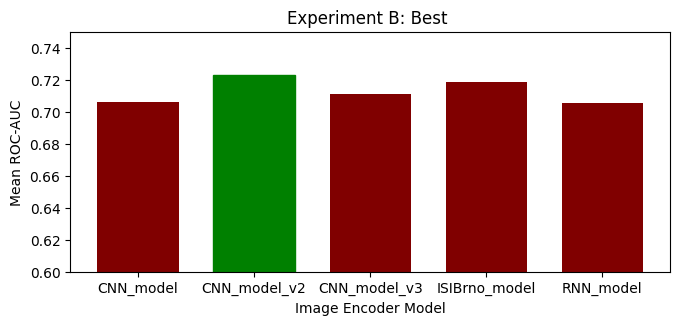

In [83]:
# Find the model with the highest average performance
best_model_expB_index = df['average_performance_expB'].idxmax()
best_model = df.loc[best_model_expB_index]

# Plot the average performance of each model
plt.figure(figsize=(12, 6))
bars = plt.bar(df['ecg_encoder_model'], df['average_performance_expB'], color='maroon', width=0.7)

# Highlight the best performing model
bars[best_model_expB_index].set_color('green')

# Set y-axis range
plt.ylim(0.6, 0.75, 0.03)

# Rotate x-axis labels
plt.xticks(rotation=0, ha='center')

plt.xlabel('Image Encoder Model')
plt.ylabel('Mean ROC-AUC')
plt.title('Experiment B: Best ')

# Adjust layout to reduce white space
plt.subplots_adjust(left=0.3, right=0.8, top=0.7, bottom=0.3)

plt.show()